In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/Users/yangli/miniconda2/envs/PUBG/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yangli/miniconda2/envs/PUBG/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Import dataset
KAGGLE_DIR = '../data/'
train = pd.read_csv(KAGGLE_DIR + 'train_V2.csv')
test = pd.read_csv(KAGGLE_DIR + 'test_V2.csv')

print("done")

# First five rows (From Head)
print('First 5 rows: ')
display(train.head())

print("done")

# Last five rows (To Tail)
print('Last 5 rows: ')
display(train.tail())

done
First 5 rows: 


Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace      ...       revives  \
0         0.00      0              0      0         60      ...             0   
1        91.47      0              0      0         57      ...             0   
2        68.00      0              0      0         47      ...             0   
3        32.90      0              0      0         75      ...             0   
4       100.00      0              0      0         45      ...             0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

done
Last 5 rows: 


Id         groupId         matchId  assists  boosts  \
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace      ...       \
4446961         0.00      0              0      0         74      ...        
4446962        44.15      0              0      0         69      ...        
4446963        59.06      0              0      0         66      ...        
4446964       180.40      1              1      2         11      ...        
4446965       268.00      0              0      1         18      ...        

         revives  rideDistance  roadKills  swimDistance  teamKills  \
4446961        0        1292.0          0         0.000          0   
4446962        0           0.0          0         0.000          0   
4446963        0           0.0          0         2.184          0   
4446964        2           0.0          0         0.000          0   
4446965        0        1369.0          0         0.000          0   

        vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
4446961               0        1019.0                3       1507   
4446962               0          81.7                6          0   
4446963               0         788.7                4          0   
4446964               0        2748.0                8          0   
4446965               0        1244.0                5          0   

         winPlacePerc  
4446961        0.1786  
4446962        0.2935  
4446963        0.4815  
4446964        0.8000  
4446965        0.5464  

[5 rows x 29 columns]

/Users/yangli/miniconda2/envs/PUBG/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


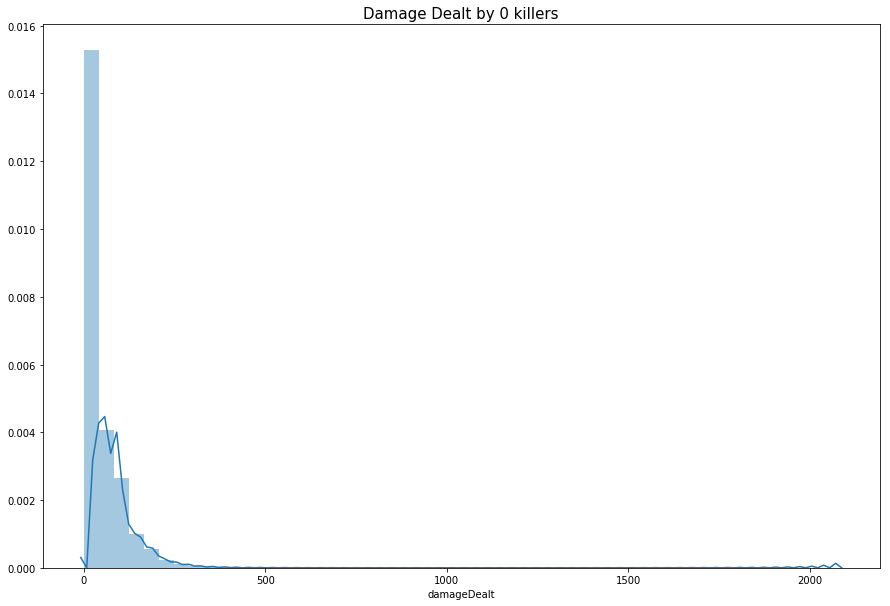

In [3]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

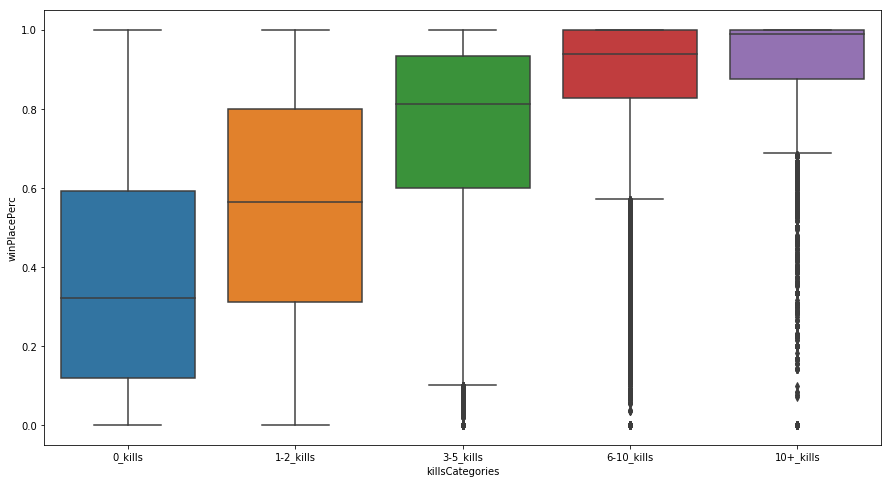

In [3]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

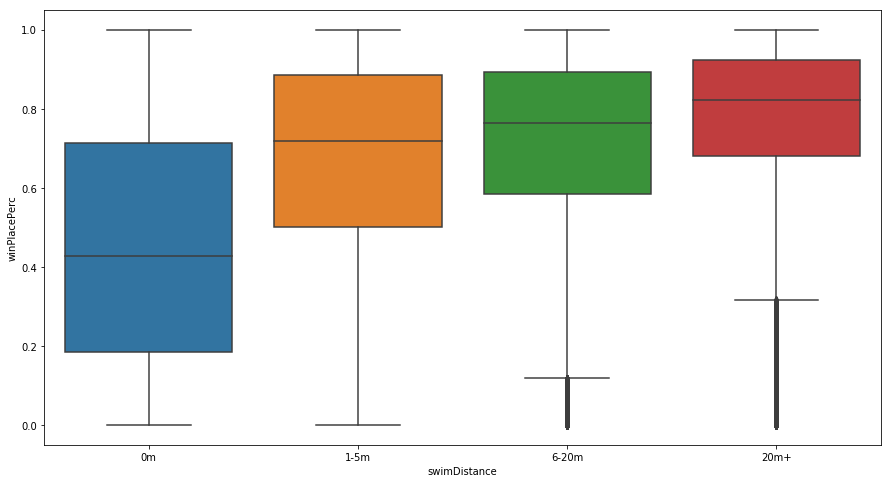

In [4]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

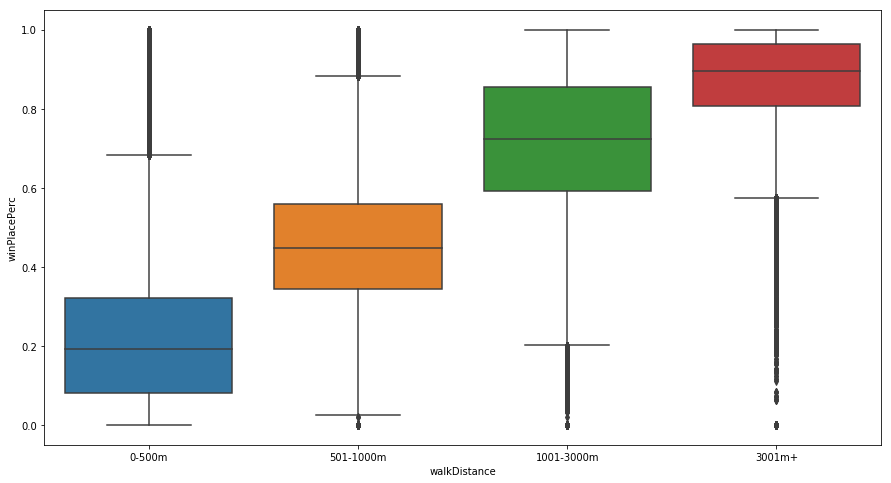

dome


In [8]:
walk = train.copy()

walk['walkDistance'] = pd.cut(walk['walkDistance'], [0, 500, 1000, 3000, 6000], labels=['0-500m','501-1000m', '1001-3000m', '3001m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="walkDistance", y="winPlacePerc", data=walk)
plt.show()
print("done")

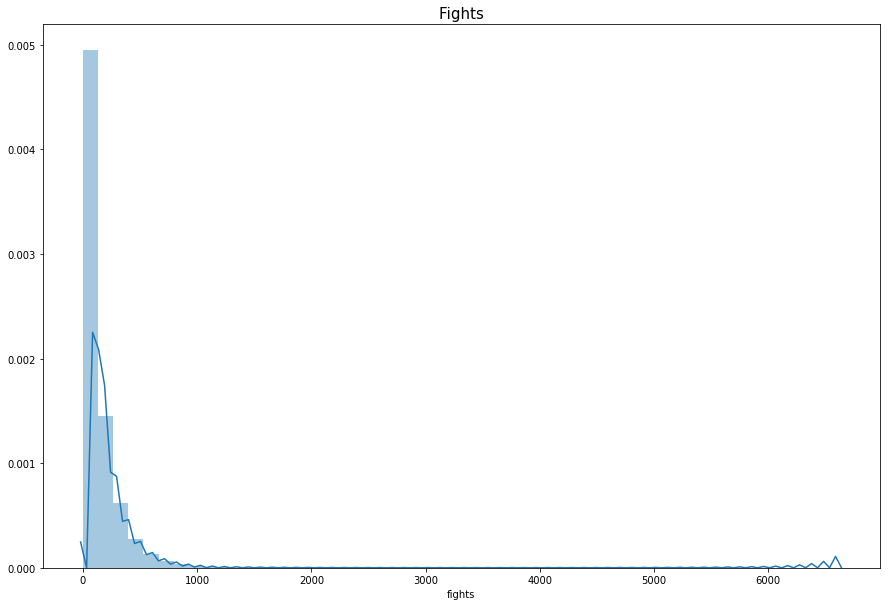

done


In [16]:
fights = train.copy()

fights['fights'] = fights['heals'] + fights['damageDealt']

plt.figure(figsize=(15,10))
plt.title("Fights",fontsize=15)
sns.distplot(fights['fights'])
plt.show()

print("done")

start
0      NaN
1    0-100
2    0-100
3    0-100
4    0-100
Name: fights, dtype: category
Categories (4, object): [0-100 < 101-300 < 301-800 < 801+]


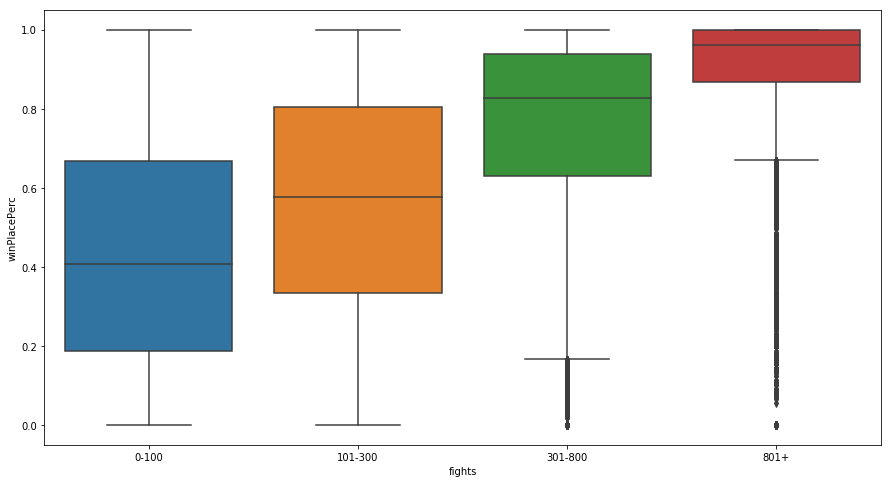

done


In [46]:
print("start")
fights['fights'] = pd.cut(fights['fights'], [0, 100, 300, 800, 3000], labels=['0-100','101-300', '301-800', '801+'])
print(fights['fights'].head())
plt.figure(figsize=(15,8))
sns.boxplot(x="fights", y="winPlacePerc", data=fights)
plt.show()
print("done")

KeyboardInterrupt: 

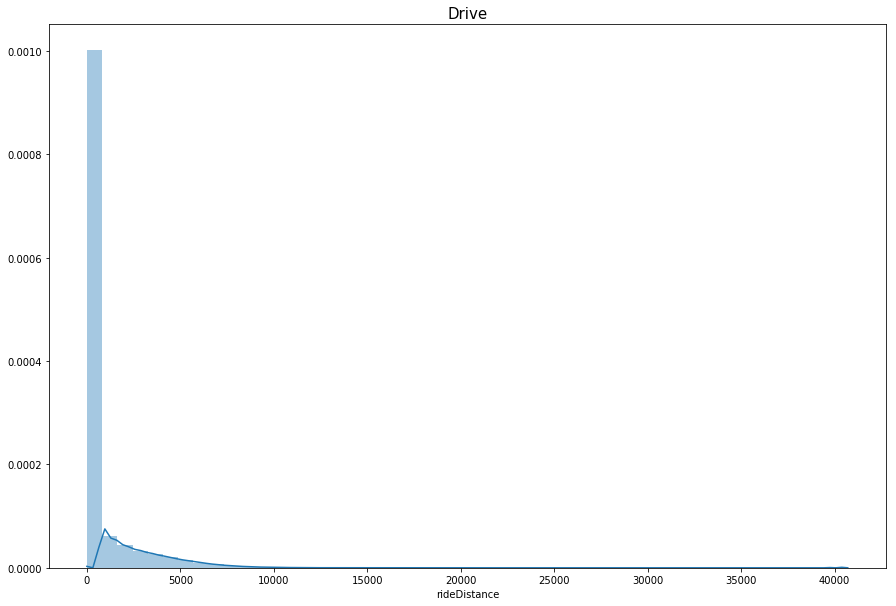

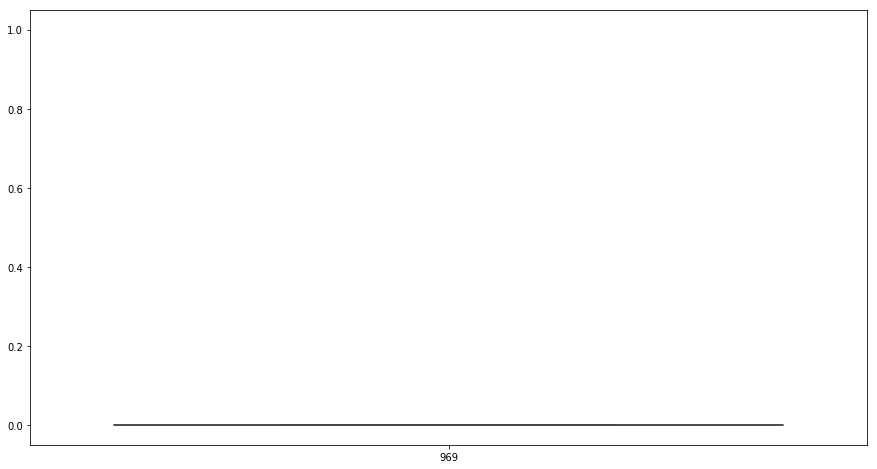

In [23]:
drive = train.copy()
plt.figure(figsize=(15,10))
plt.title("Drive",fontsize=15)
sns.distplot(drive['rideDistance'])


drive['rideDistance'] = pd.cut(drive['rideDistance'], [0, 500, 1000, 3000, 8000], labels=['0-500m','501-1000m', '1001-3000m', '3001m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="walkDistance", y="winPlacePerc", data=drive)
plt.show()
print("done")

1    11-30
2      0-5
3     6-10
4      0-5
5      0-5
Name: escape, dtype: category
Categories (4, object): [0-5 < 6-10 < 11-30 < 31+]


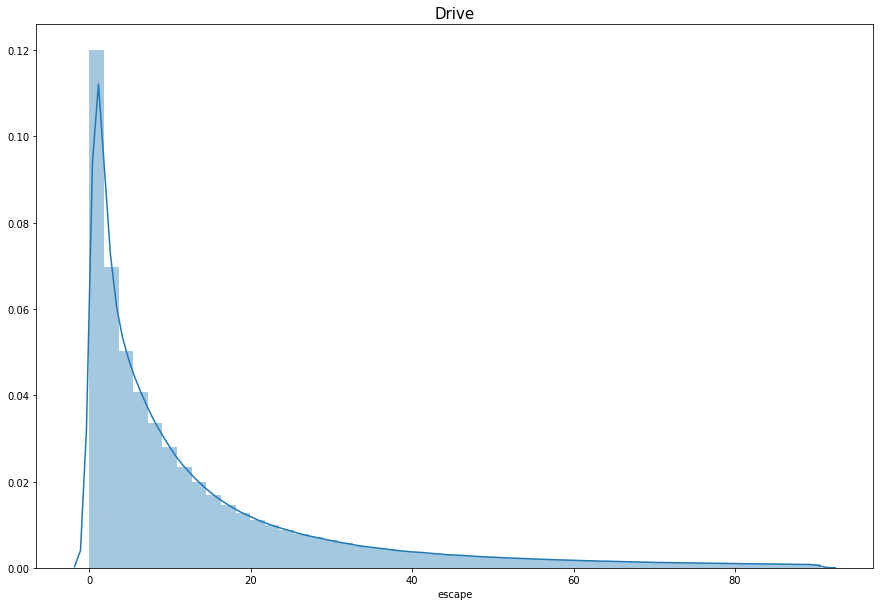

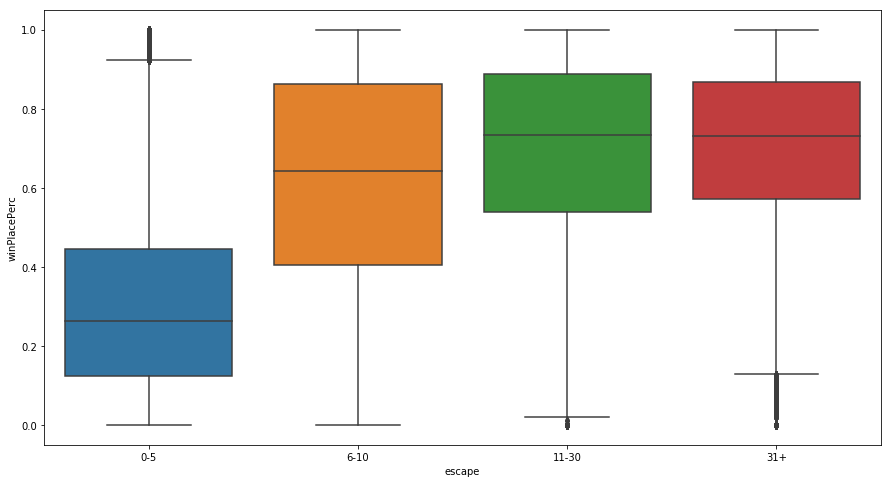

done


In [47]:
escape = train.copy()

# fights['fights'] = fights['fights'] != 0
escape['totalDistance'] = escape['rideDistance'] + escape['walkDistance'] + escape['swimDistance']
escape['fights'] = escape['heals'] + escape['damageDealt']

escape = escape[escape['fights'] != 0]
escape = escape[escape['totalDistance'] != 0]

escape['escape'] = escape['totalDistance'] / escape['fights']
escape = escape[escape['escape'] < escape['escape'].quantile(0.9)]

plt.figure(figsize=(15,10))
plt.title("Drive",fontsize=15)
sns.distplot(escape['escape'])

escape["escape"] = pd.cut(escape["escape"], [0, 5, 10, 30, 100], labels=['0-5','6-10', '11-30', '31+'])

print(escape["escape"].head())
plt.figure(figsize=(15,8))
sns.boxplot(x="escape", y="winPlacePerc", data=escape)
plt.show()
print("done")